<a href="https://colab.research.google.com/github/XinminChuUMB/cs480student/blob/main/04/Copy_of_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

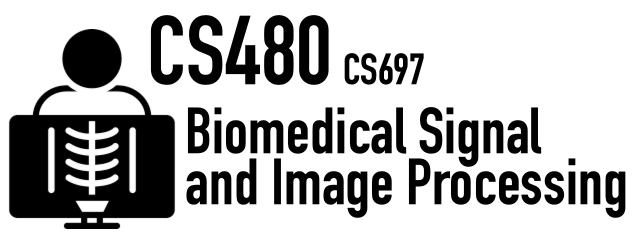
#Assignment 4

Xinmin Chu

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using mahotas again, so lets install it!
!pip install mahotas

     |████████████████████████████████| 5.7 MB 4.2 MB/s 


In [3]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [4]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

#NORMAL_DIR = 'normal/'
#PNEUMONIA_DIR = 'pneumonia/'

In [5]:
NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [6]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

In [ ]:
# TODO: YOUR CODE

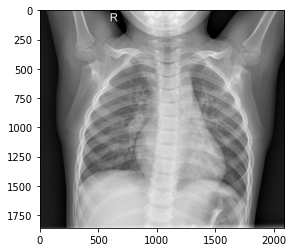

In [7]:
# Display image "IM-0115-0001.jpg"
from pylab import imshow, show
imshow(img, cmap='gray')
show()

In [8]:
# Print the dimension of image "IM-0115-0001.jpg"
img.shape

(1858, 2090)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [9]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [10]:
normal_images.shape

(100, 300, 300)

In [12]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [13]:
pneumonia_images.shape

(100, 300, 300)

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER [Convert the images to Grayscale]
# TODO: Operation 2) YOUR ANSWER [Resize the images to 300x300]

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [ ]:
# TODO: YOUR CODE

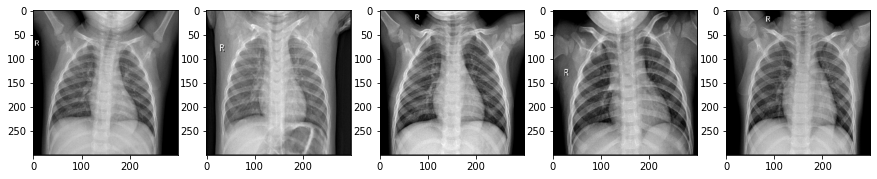

In [14]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15, 10))
for i in range(5):
  f.add_subplot(1, 5, i + 1)
  img = normal_images[i, :, :]
  imshow(img, cmap='gray')

plt.show()

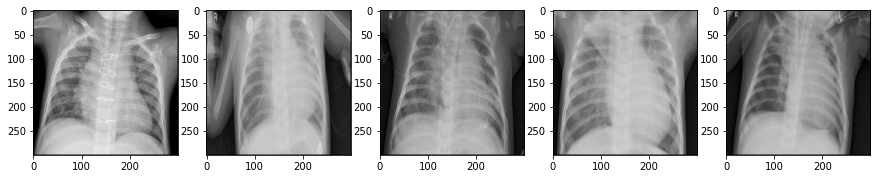

In [15]:
f = plt.figure(figsize=(15, 10))
for i in range(5):
  f.add_subplot(1, 5, i + 1)
  img = pneumonia_images[i, :, :]
  imshow(img, cmap='gray')

plt.show()

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [16]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [17]:
training_data.shape

(120, 90000)

In [18]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.hstack((np.zeros(TRAINING_COUNT), np.ones(TRAINING_COUNT)))

In [19]:
training_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [20]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [21]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.hstack((np.zeros(TESTING_COUNT), np.ones(TESTING_COUNT)))

In [22]:
testing_target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [23]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [24]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER

Random forest is a classifier that contains multiple decision trees, and its output classes are determined by the mode of the classes output by the individual trees. Each tree is built according to the following algorithm:
1) Let N represent the number of training cases (samples), and M represent the number of features.
2) The number of input features m is used to determine the decision result of a node on the decision tree; where m should be much smaller than M.
3) From N training cases (samples) with replacement sampling, sample N times to form a training set (that is, bootstrap sampling), and use the unsampled cases (samples) as predictions to evaluate its error.
4) For each node, m features are randomly selected, and the decision of each node on the decision tree is determined based on these features. According to the m features, calculate the optimal splitting method.
5) Each tree grows fully without pruning, which may be used after building a normal tree classifier.

In [25]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.9125

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [27]:
sc = np.zeros(100)
for i in range(100):
  clf1 = RandomForestClassifier()
  fitted1 = clf1.fit( training_data, training_target )
  sc[i] = clf1.score( testing_data, testing_target )

In [28]:
min(sc)

0.8625

In [29]:
max(sc)

0.925

In [30]:
mean(sc)

0.8971250000000001

In [ ]:
# TODO: YOUR ANSWER

Based on 100 runs of this random forest classification, the mean accuracy 89.8%, which means that the classification accuracy is quite good. It's not surprise since the random forest algorithm is a reliable method.

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER

In [31]:
predictions = clf.predict(testing_data)

In [32]:
print(testing_target)
print(predictions[0:40])
print(predictions[40:])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
[1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.]


In [33]:
misclf_normal = np.where(predictions[0:40] != 0)
print(misclf_normal)

(array([ 2,  4,  8, 31, 37]),)


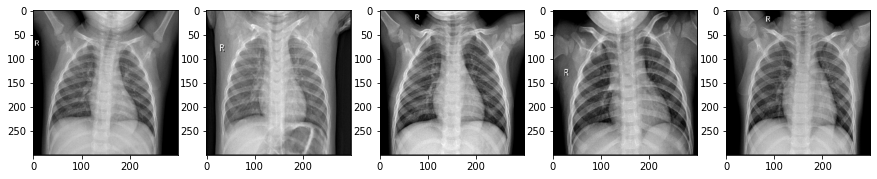

In [35]:
f_normal = plt.figure(figsize=(15, 10))
for i in range(len(misclf_normal[0])):
  f_normal.add_subplot(1, len(misclf_normal[0]), i + 1)
  img_normal = normal_images[i, :, :]
  imshow(img_normal, cmap='gray')

plt.show()

In [36]:
misclf_pneumonia = np.where(predictions[40:] != 1)

In [37]:
print(misclf_pneumonia)

(array([ 1,  4, 12, 35, 38]),)


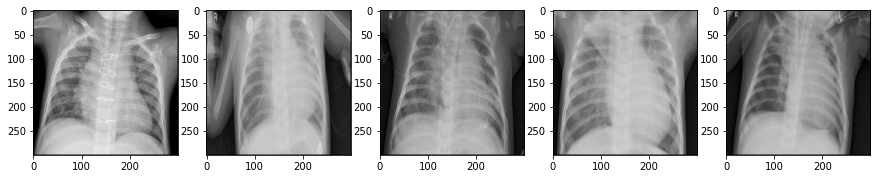

In [38]:
f_pneumonia = plt.figure(figsize=(15, 10))
for i in range(len(misclf_pneumonia[0])):
  f_pneumonia.add_subplot(1, len(misclf_pneumonia[0]), i + 1)
  img_pneumonia = pneumonia_images[i, :, :]
  imshow(img_pneumonia, cmap='gray')

plt.show()

Both in 'NORMAL' images and 'PNEUMONIA'images, there are 5 images misclassified. The possible reason is that these images features are not inclued in the training dataset so that there is not enough information to do good prediction.

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [40]:
# TODO: YOUR ANSWER

We can train more data to improve the classification performance.

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw